In [108]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [109]:
table = 'observer_inat'
schema = 'features'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [110]:
df.columns

Index(['recordedBy', 'inat_obv_log_z_score', 'inat_id_log_z_score',
       'inat_sp_log_z_score', 'inat_rank_log_z_score', 'obs_p_rank',
       'id_p_rank', 'sp_p_rank', 'rank_p_rank'],
      dtype='object')

In [111]:
df = df.select_dtypes('number')
#df['identifications_count'] = df['identifications_count'] + 1
#df['species_count'] = df['species_count'] + 1

In [112]:
df.describe()

,inat_obv_log_z_score,inat_id_log_z_score,inat_sp_log_z_score,inat_rank_log_z_score,obs_p_rank,id_p_rank,sp_p_rank,rank_p_rank
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000
mean,-0.000120,0.000087,-0.000180,-0.000120,0.496451,0.496451,0.496451,0.496451
std,1.000092,1.000349,1.000337,1.000092,0.292473,0.292473,0.292473,0.292473
min,-1.572570,-0.581452,-1.983687,-1.572570,0.000000,0.000000,0.000000,0.000000
25%,-0.734856,-0.581452,-0.671074,-0.734856,0.247000,0.247000,0.247000,0.247000
50%,-0.204288,-0.581452,-0.095903,-0.204288,0.498000,0.498000,0.498000,0.498000
75%,0.612070,0.286959,0.725142,0.612070,0.749250,0.749250,0.749250,0.749250
max,4.039995,4.439096,2.953980,4.039995,1.000000,1.000000,1.000000,1.000000


In [123]:
df.var()

inat_obv_log_z_score     1.000185
inat_id_log_z_score      1.000699
inat_sp_log_z_score      1.000674
inat_rank_log_z_score    1.000185
obs_p_rank               0.085540
id_p_rank                0.085540
sp_p_rank                0.085540
rank_p_rank              0.085540
dtype: float64

In [120]:
x1= 'inat_obv_log_z_score'
x2 ='inat_id_log_z_score'
x3 = 'inat_sp_log_z_score'
x4 = 'inat_rank_log_z_score'

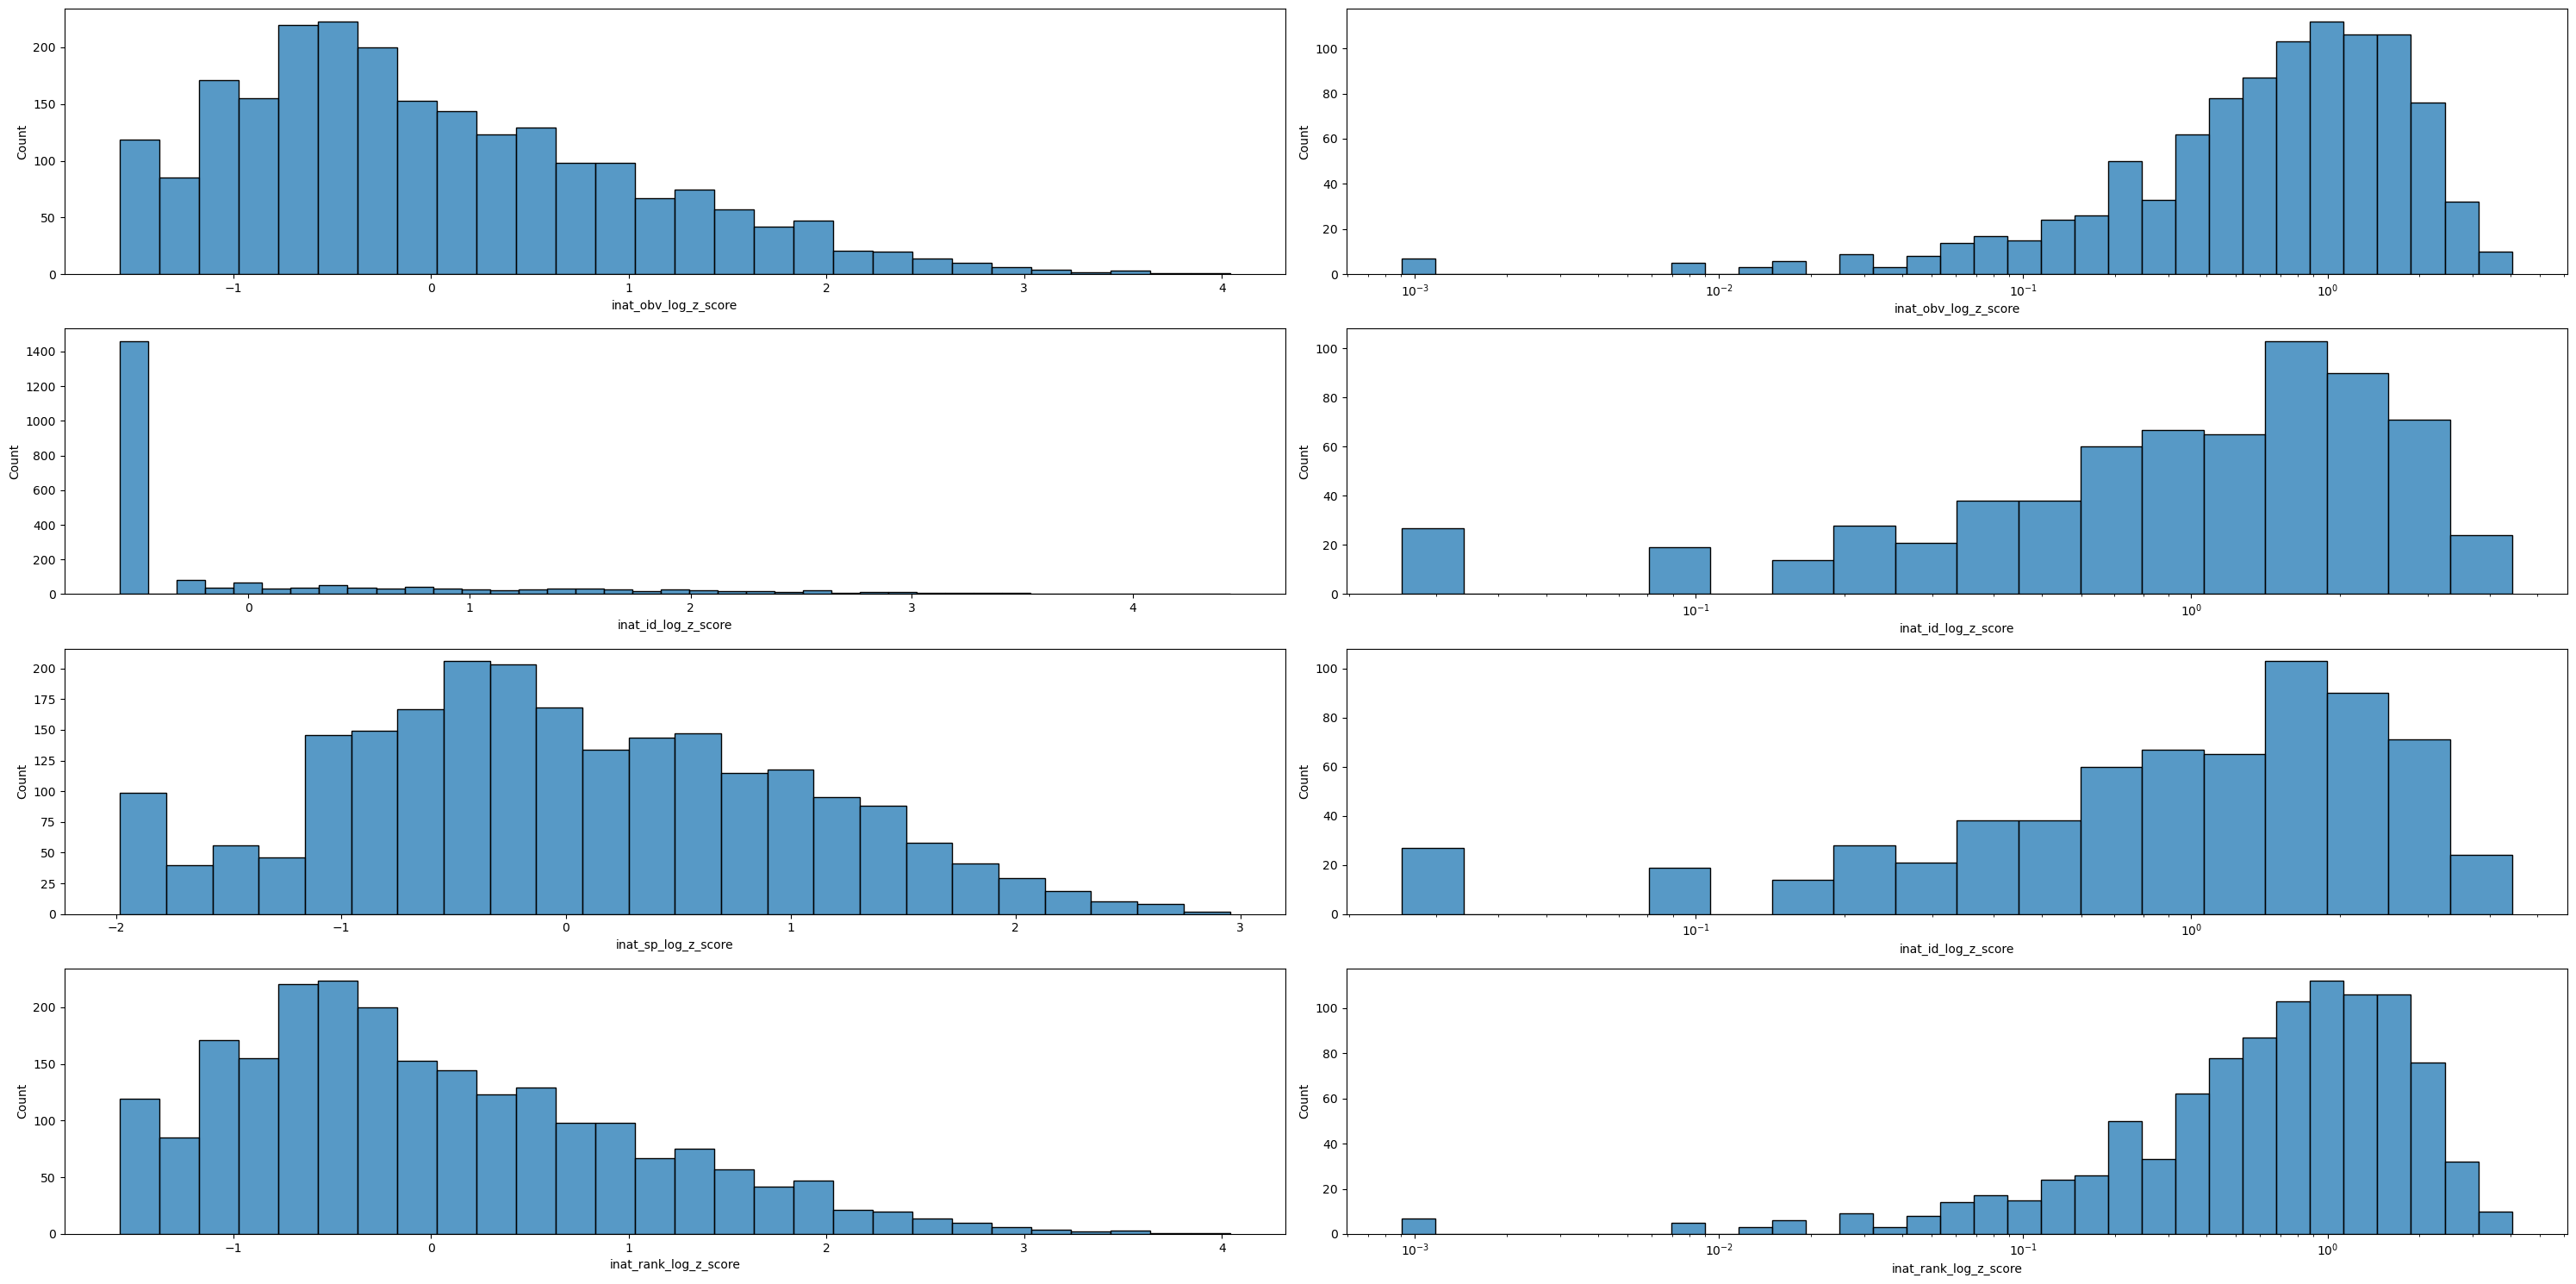

In [122]:

ratio = (2,1)
size = 15
fig, axes = plt.subplots(4, 2, figsize=(ratio[0]*size, ratio[1]*size))

sns.histplot(df, x = x1, log_scale = False, ax=axes[0,0])
sns.histplot(df, x = x1, log_scale = True, ax=axes[0,1])

sns.histplot(df, x = x2, log_scale = False, ax=axes[1,0])
sns.histplot(df, x = x2, log_scale = True, ax=axes[1,1])

sns.histplot(df, x = x3, log_scale = False, ax=axes[2,0])
sns.histplot(df, x = x2, log_scale = True, ax=axes[2,1])

sns.histplot(df, x = x4, log_scale = False, ax=axes[3,0])
sns.histplot(df, x = x4, log_scale = True, ax=axes[3,1])

plt.tight_layout()
plt.show()

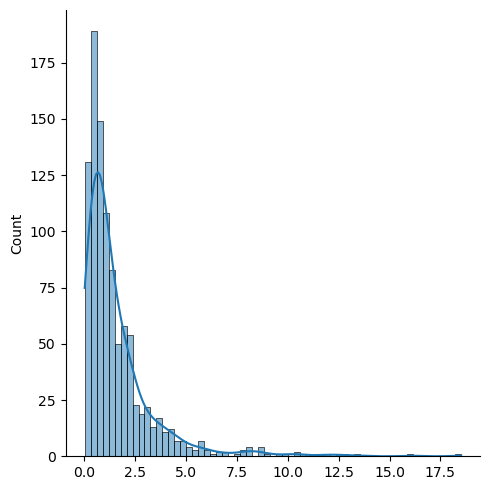

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate log-normal data
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Plot using displot (histogram + KDE)
sns.displot(data, kde=True)
plt.show()

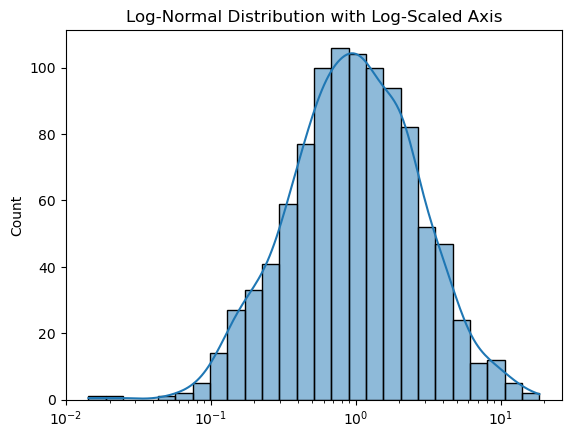

In [ ]:
sns.histplot(data=data, log_scale=True, kde=True)
plt.title("Log-Normal Distribution with Log-Scaled Axis")
plt.show()

Text(0.5, 1.0, 'Log-Transformed (Normal)')

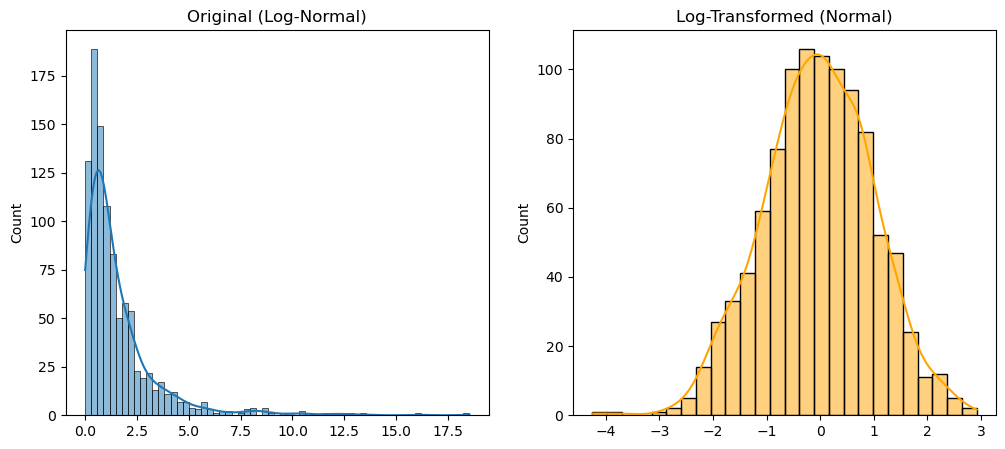

In [ ]:
# Compare log-normal and transformed normal side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Log-Normal
sns.histplot(data, kde=True, ax=axes[0])
axes[0].set_title("Original (Log-Normal)")

# Log-Transformed (Normal)
sns.histplot(np.log(data), kde=True, ax=axes[1], color="orange")
axes[1].set_title("Log-Transformed (Normal)")



In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto # A common power-law distribution example

# Generate data following a power law (Pareto distribution)
# 'b' is the shape parameter (alpha in power law notation, here alpha = 2)
alpha = 2
data = pareto.rvs(b=alpha, size=1000)
# Often power laws have a minimum value > 0, so let's shift it a bit
data += 1


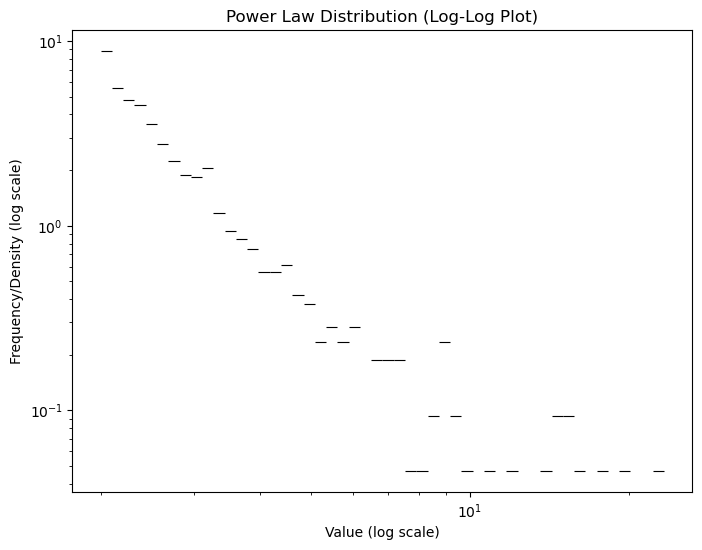

In [ ]:
# Create a histogram with logarithmic scales on both x and y axes
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=50, kde=False, stat="density", log_scale=[True, True])

plt.title("Power Law Distribution (Log-Log Plot)")
plt.xlabel("Value (log scale)")
plt.ylabel("Frequency/Density (log scale)")
plt.show()


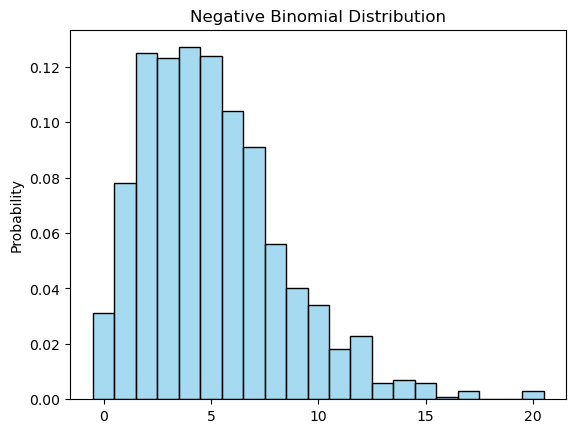

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters: n = number of successes, p = probability of success
n, p = 5, 0.5
data = nbinom.rvs(n, p, size=1000)

# Plotting as a discrete histogram
sns.histplot(data, discrete=True, stat="probability", color="skyblue")
plt.title("Negative Binomial Distribution")
plt.show()

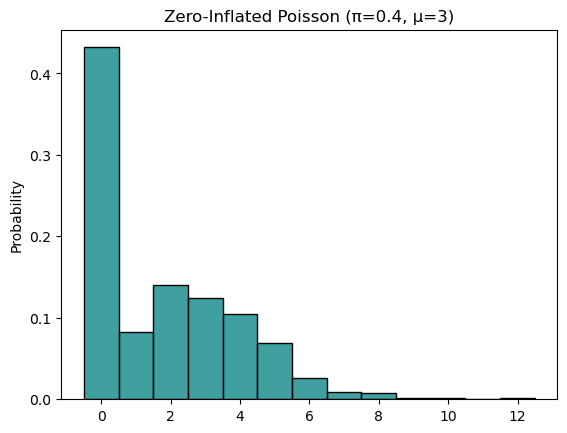

In [ ]:
import numpy as np
from scipy.stats import poisson

# ZIP Parameters: pi = probability of a "structural" zero, mu = Poisson mean
pi = 0.4
mu = 3
size = 1000

# Generate data: a Bernoulli choice between 0 and a Poisson value
zeros = np.zeros(int(size * pi))
poisson_counts = poisson.rvs(mu, size=int(size * (1 - pi)))
zip_data = np.concatenate([zeros, poisson_counts])

# Plotting the ZIP
sns.histplot(zip_data, discrete=True, stat="probability", color="teal")
plt.title(f"Zero-Inflated Poisson (π={pi}, μ={mu})")
plt.show()
